In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_palette('husl')

In [2]:
# set up the dataset
X = load_iris()['data']
y = load_iris()['target']

# split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, shuffle=True,
                                                    stratify=y)

In [3]:
# load the data to tensor objects
X_train_tensor = torch.tensor(data= X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(data= X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(data = y_train, dtype = torch.long)
y_test_tensor = torch.tensor (data= y_test, dtype = torch.long)

In [4]:
# set up the model architecture


class Flower_NN(nn.Module):

  def __init__(self, input_dim:int) -> None:
    super().__init__()
    self.fc1 = nn.Linear(in_features=input_dim, out_features=750)
    self.fc2 = nn.Linear(in_features=750, out_features= 500)
    self.fc3 = nn.Linear(in_features=500, out_features=150)
    self.out = nn.Linear(in_features=150, out_features=3)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.45)

  def forward(self, x: torch.tensor):
    result = self.relu(self.fc1(x))
    result = self.dropout(result)
    result = self.relu(self.fc2(result))
    result = self.dropout(result)
    result = self.relu(self.fc3(result))
    result = self.dropout(result)
    result = self.out(result)

    return result

In [5]:
# init the model and hyperparams

model = Flower_NN(input_dim=X_train.shape[1])
optimizer = optim.Adam(params = model.parameters(), lr =1e-4)
criterion = nn.CrossEntropyLoss()
EPOCHS = 3000

In [6]:
# begin the training loop
loss_list = []
model.train()
for epoch in range(EPOCHS):
  # forward pass
  train_preds = model(X_train_tensor)
  loss = criterion(train_preds, y_train_tensor)

  # back prop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  loss_list.append(loss.item())

  if epoch % 500 == 0:
    print(f'Epoch: {(epoch//500) + 1}/6.......Loss: {loss.item()}')

Epoch: 1/6.......Loss: 1.1903076171875
Epoch: 2/6.......Loss: 0.1507415920495987
Epoch: 3/6.......Loss: 0.06634482741355896
Epoch: 4/6.......Loss: 0.07648283988237381
Epoch: 5/6.......Loss: 0.048175111413002014
Epoch: 6/6.......Loss: 0.08314218372106552


Text(0, 0.5, 'Loss')

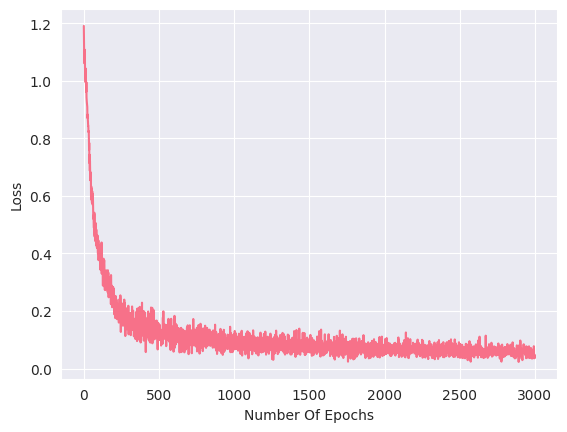

In [8]:
# visualiz the loss

plt.plot(list(range(3000)), loss_list)
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')

In [7]:
loss.item()

0.036421824246644974

In [26]:
# inference

model.eval()
with torch.no_grad():
  test_preds = model(X_test_tensor)
  logits, preds = torch.max(test_preds, 1)
  preds = preds.detach().numpy()

In [28]:
print(f"f1 score: {f1_score(y_test, preds, average = 'weighted')}")

f1 score: 0.9665831244778613


In [29]:
# classification report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<Axes: >

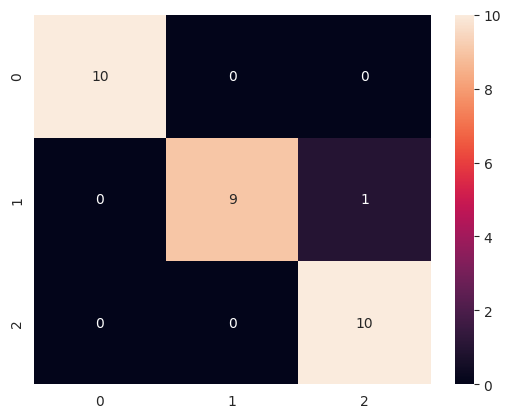

In [30]:
sns.heatmap(data = confusion_matrix(y_test, preds), annot = True, fmt = 'd',
            cbar = 'False')